In [1]:
# Salary_hike -> Build a prediction model for Salary_hike

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
salary_data = pd.read_csv('Salary_Data.csv')
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# initial anylisis

In [5]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
salary_data.shape

(30, 2)

In [7]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [8]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

hence no null values

In [9]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


average experiance is 5.31 and average salary is 76003.00

min experiance is 1.1 years and max experiance is 10.5

min salary is 33331.00  and max salary is 122391

In [10]:
#correlation statement

In [11]:
cor =salary_data.corr()
cor     

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

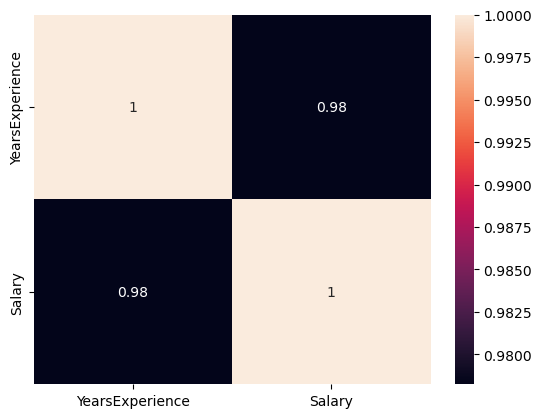

In [12]:
sns.heatmap(cor,annot=True)

there is high positive correlation between experience and salary

In [13]:
# Boxplot Of Experience

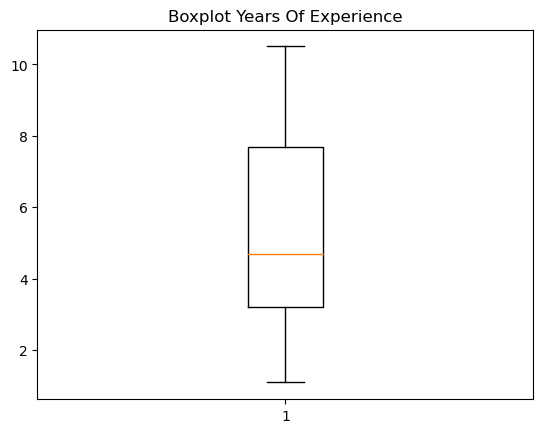

In [14]:
plt.boxplot(x='YearsExperience',data=salary_data)
plt.title('Boxplot Years Of Experience')
plt.show()

In [15]:
#Boxplot Of Salary

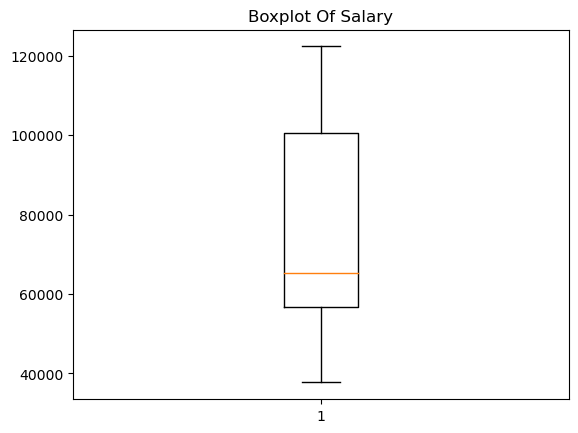

In [16]:
plt.boxplot(x='Salary',data=salary_data)
plt.title('Boxplot Of Salary')
plt.show()

In [17]:
#Linearity

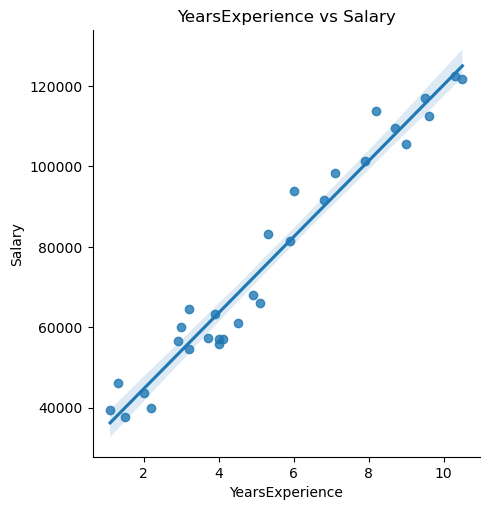

In [18]:
sns.lmplot(x='YearsExperience',y='Salary',data=salary_data)
plt.title('YearsExperience vs Salary')
plt.show()

In [19]:
#Normality

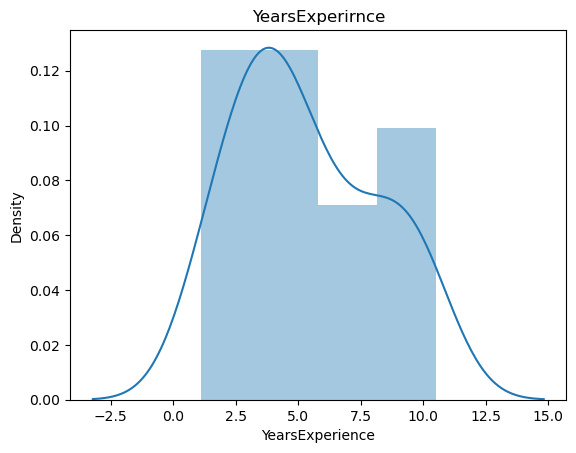

In [20]:
sns.distplot(salary_data['YearsExperience'])
plt.title('YearsExperirnce')
plt.show()

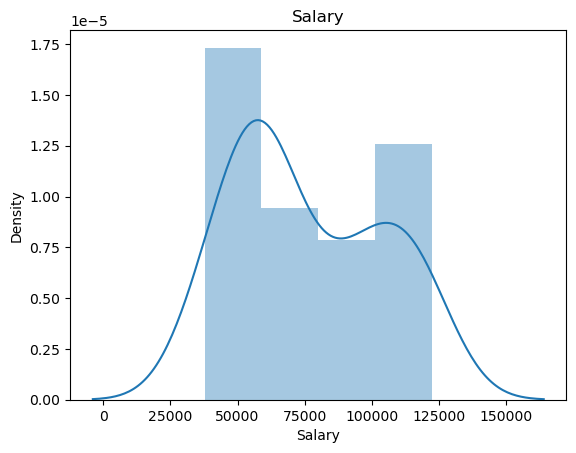

In [21]:
sns.distplot(salary_data['Salary'])
plt.title('Salary')
plt.show()

most of the data lie within group 50000 - 125000

In [22]:
# Model Building || Model Training

In [23]:
salary_data=salary_data.rename(columns={"YearsExperience":"X",'Salary':'y'})
salary_data.head()

,X,y
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [24]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [25]:
model = smf.ols('y~X',data=salary_data).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           1.14e-20
Time:                        14:33:54   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
X           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#parameters
model.params

Intercept    25792.200199
X             9449.962321
dtype: float64

In [28]:
#t-values and p-values
print(model.tvalues ,'\n', model.pvalues)

Intercept    11.346940
X            24.950094
dtype: float64 
 Intercept    5.511950e-12
X            1.143068e-20
dtype: float64


In [29]:
(model.rsquared,model.rsquared_adj)
#R squared values

(0.9569566641435086, 0.9554194021486339)

r-square value is 0.956 

In [30]:
#Residual Plot

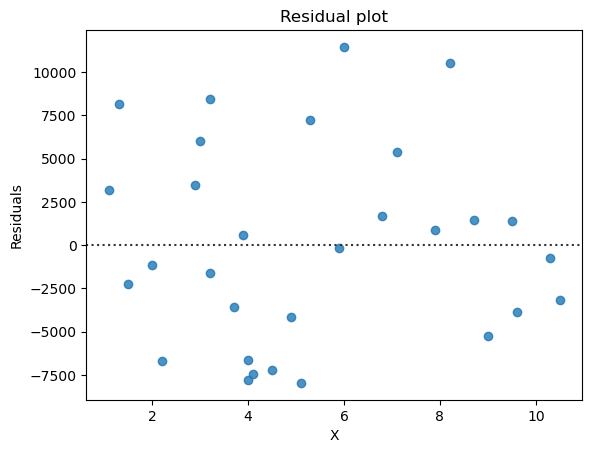

In [31]:
sns.residplot(x=salary_data['X'],y=model.resid)
plt.title('Residual plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()

 the residual plot has random pattern, that indicating a good fit for a linear model.

In [32]:
# 1) Log Tranformation

In [33]:
salary_data.head()

,X,y
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [34]:
salary_data['log_x'] = np.log(salary_data['X'])

In [35]:
salary_data.head()

,X,y,log_x
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457


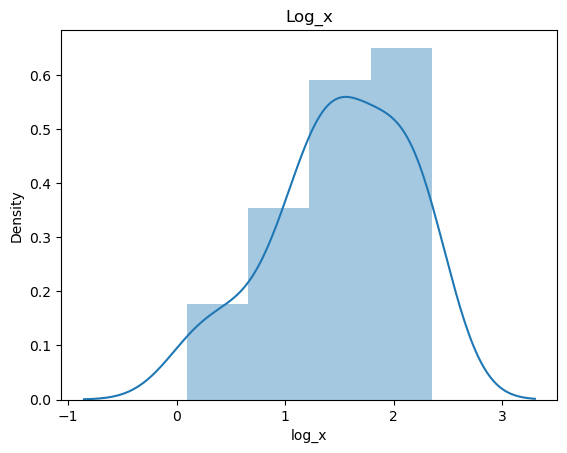

In [36]:
sns.distplot(salary_data['log_x'])
plt.title("Log_x")
plt.show()

In [37]:
#  Model Training

In [38]:
model_1 = smf.ols('y~log_x',data=salary_data).fit()

In [39]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           3.25e-13
Time:                        14:33:55   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_x       4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
model_1.rsquared

0.8538888828756969

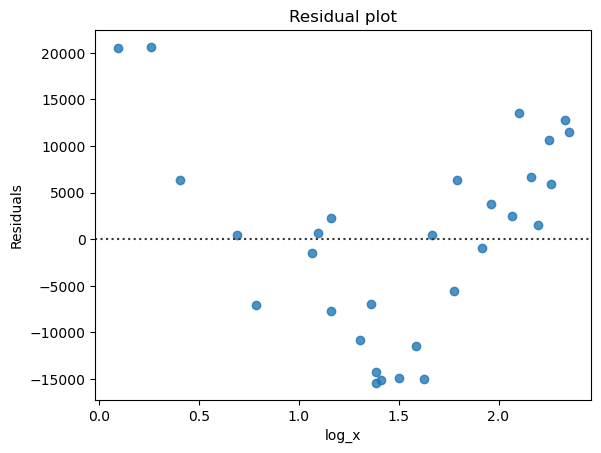

In [41]:
sns.residplot(x=salary_data['log_x'],y=model_1.resid)
plt.title('Residual plot')
plt.xlabel('log_x')
plt.ylabel('Residuals')
plt.show()

The above residual plot show U-shape,which indicates our residual are Non-random.

In [42]:
# 2 Quadratic model (SQRT Transformation)

In [43]:
salary_data['sqrt_x'] = np.sqrt(salary_data['X'])

In [44]:
salary_data.head()

,X,y,log_x,sqrt_x
0,1.1,39343.0,0.095310,1.048809
1,1.3,46205.0,0.262364,1.140175
2,1.5,37731.0,0.405465,1.224745
3,2.0,43525.0,0.693147,1.414214
4,2.2,39891.0,0.788457,1.483240


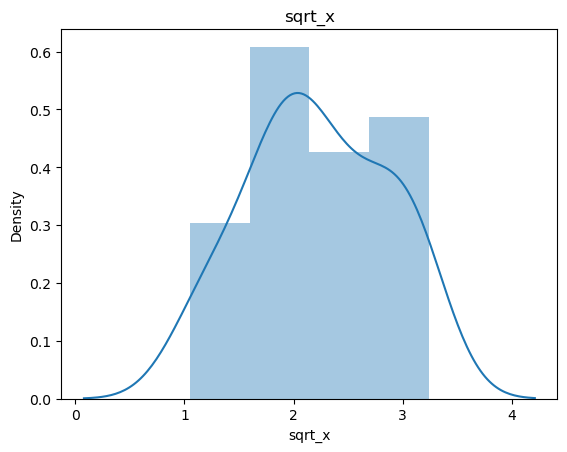

In [45]:
sns.distplot(salary_data['sqrt_x'])
plt.title("sqrt_x")
plt.show()

In [46]:
# Model Training

In [47]:
model_2 = smf.ols('y~sqrt_x',data=salary_data).fit()

In [48]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           8.57e-18
Time:                        14:33:57   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
sqrt_x       4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
model_2.rsquared

0.9310009544993526

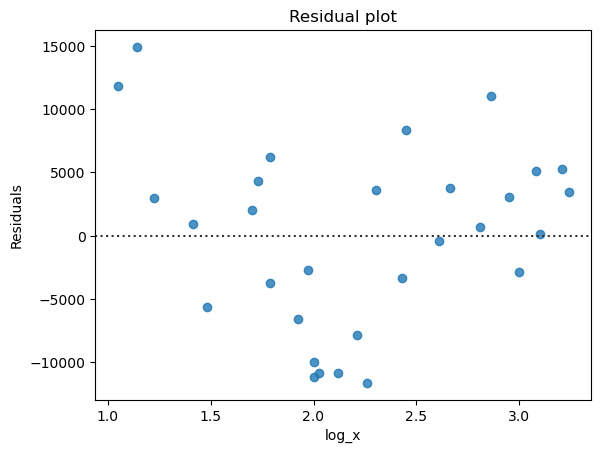

In [50]:
sns.residplot(x=salary_data['sqrt_x'],y=model_2.resid)
plt.title('Residual plot')
plt.xlabel('log_x')
plt.ylabel('Residuals')
plt.show()

The above residual plot show U-shape,which indicates our residual are Non-random.

In [51]:
# 3 Reciprocal model (1/y) Transformation

In [52]:
salary_data['res_proc_y']  = 1/salary_data['y']

In [53]:
salary_data.head()

,X,y,log_x,sqrt_x,res_proc_y
0,1.1,39343.0,0.095310,1.048809,0.000025
1,1.3,46205.0,0.262364,1.140175,0.000022
2,1.5,37731.0,0.405465,1.224745,0.000027
3,2.0,43525.0,0.693147,1.414214,0.000023
4,2.2,39891.0,0.788457,1.483240,0.000025


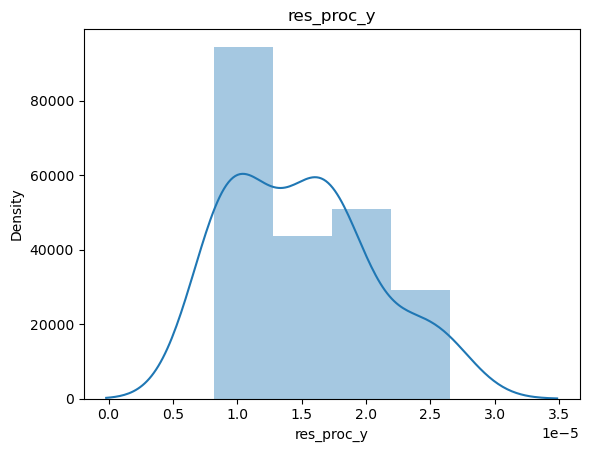

In [54]:
sns.distplot(salary_data['res_proc_y'])
plt.title("res_proc_y")
plt.show()

In [55]:
# Model Training

In [56]:
model_3 = smf.ols('res_proc_y~X',data=salary_data).fit()

In [57]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             res_proc_y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     173.2
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           1.63e-13
Time:                        14:33:58   Log-Likelihood:                 350.83
No. Observations:                  30   AIC:                            -697.7
Df Residuals:                      28   BIC:                            -694.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.454e-05    8.2e-07     29.913      0.000    2.29e-05    2.62e-05
X          -1.799e-06   1.37e-07    -13.162      0.000   -2.08e-06   -1.52e-06
==============================================================================
Omnibus:                        1.760   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.415   Jarque-Bera (JB):                1.380
Skew:                           0.516   Prob(JB):                        0.502
Kurtosis:                       2.802   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
model_3.rsquared

0.8608672473082564

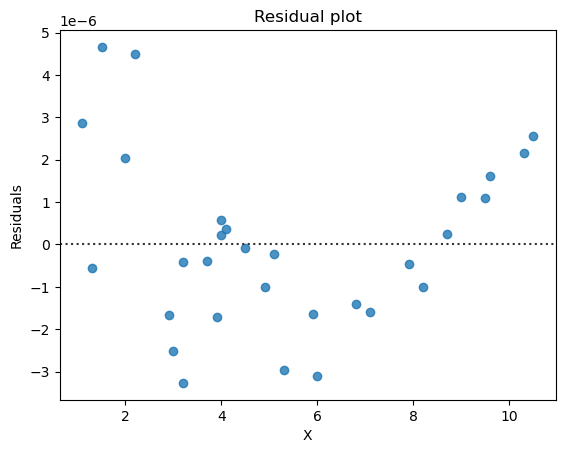

In [59]:
sns.residplot(x=salary_data['X'],y=model_3.resid)
plt.title('Residual plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()

residual plot shows little bit U-shape

In [60]:
# Model Selection

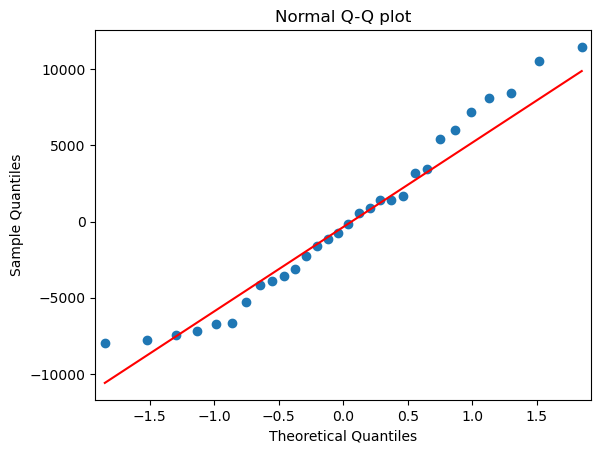

In [61]:
#Normal Q-Q Plot
sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot')
plt.show()

In [62]:
#for prediction
test_data=salary_data['X']

In [63]:
predict_y = model.predict(test_data)
print(predict_y.head())

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64


In [64]:
  actual = salary_data['y']
actual.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: y, dtype: float64

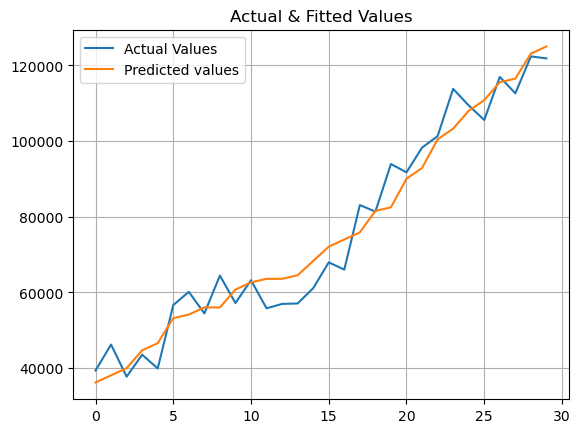

In [65]:
#plot for actual and fitted  values
plt.plot(actual,label='Actual Values')
plt.plot(predict_y,label='Predicted values')
plt.title('Actual & Fitted Values')
legend=plt.legend()
plt.grid(True)
plt.show()

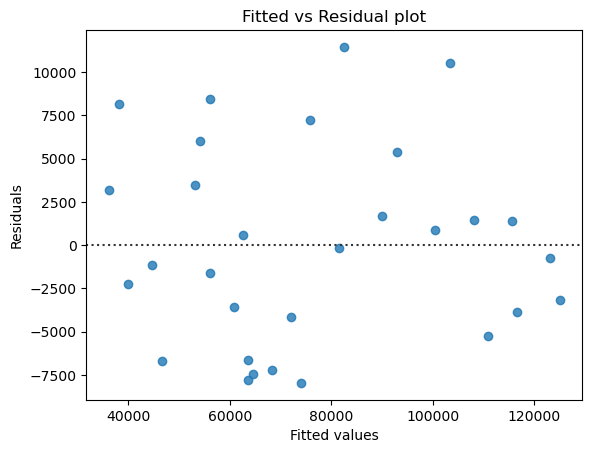

In [66]:
sns.residplot(x=predict_y,y=model.resid)
plt.title('Fitted vs Residual plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()